# Steinschlagrisiko Challenge FS24 CWM1

## Einleitung
### Aufgabenstellung
Die Kantonsstrasse unterhalb Schiers (GR) ist vom Steinschlag betroffen. Steine lösen sich von zwei unterschiedlichen Stellen an der Felswand ab (Ablösungszone 1 und Ablösungszone 2). Der betroffene Strassenabschnitt ist mit Steinfangnetzen gesichert, die jedoch in die Jahre gekommen sind und die angestrebte Sicherheit nicht mehr gewährleisten können. Die Planung für Ersatznetze hat bereits begonnen, kann aber frühstens in einem Jahr umgesetzt werden.

In den letzten Monaten haben sich mehrere Steinschlagereignisse ereignet. Kommt es im Lauf des nächsten Jahres zu weiteren vergleichbaren Ereignissen, könnten die alten Sicherheitsnetze versagen und die Verkehrsteilnehmer einem grossen Sicherheitsrisiko ausgesetzt sein. Die Bevölkerung ist verunsichert und der Kantonsingenieur muss schnell entscheiden, ob das Risiko für die Verkehrsteilnehmer zu gross ist und die Kantonsstrasse vorübergehend gesperrt werden muss. Der Kantonsingenieur hat sie beauftragt, anhand von vorhanden Daten die Wahrscheinlichkeit eines Todesfalls zu berechnen und eine Empfehlung bezüglich der Schliessung bzw Offenhaltung der Strasse auszusprechen.

Damit die Strasse offen bleiben kann, muss gezeigt werden, dass die jährliche Wahrscheinlichkeit von Todesfällen infolge Steinschlags kleiner als 0.002 ist. Für die Berechnungen soll ein gut strukturierter und dokumentierter Code in Python oder R entwickelt werden.

### Grundlagen
Für die Planung der neuen Sicherheitsnetze, hat ein beauftragter Geologe, über drei Monate Daten zu den Steinschlagereignisse aufgenommen. Dabei wurde Steingeschwindigkeit, Steinmasse und Zeitpunkt und der Zeitpunkt des Ereignis registriert. Diese Daten können von Ihnen zur Modellbildung verwendet werden und stehen unter folgenden Links zur Verfügung:

Ereignis aus Ablösungszone 1: https://www.dropbox.com/s/i58gdv6pzi03rhr/out_1.csv?dl=0

Ereignis aus Ablösungszone 2: https://www.dropbox.com/s/3nk9pv7nzz8f0qb/out_2.csv?dl=0

NB: Die Geschwindigkeit ist durch einen Radar aufgenommen und sehr präzise. Die Masse ist eine Experten-Schätzung des Geologen.

Ein beauftragtes Ingenieurbüro hat geschätzt, dass die Sicherheitsnetze bis zu einer Aufprallenergie von 1200 kJ sicher sind. Falls bereits Steine mit Gesamtmasse über 2000kg in den Sicherheitsnetzen liegen, beträgt die Aufprallenergie, die von den Sicherheitsnetzen aufgenommen werden kann, nur noch 600 kJ. Steine in den Sicherheitsnetze werden vom Unterhaltsteam entfernt (die Reaktionszeit beträgt 24 Stunden).

Das tägliche Verkehrsaufkommen beträgt 600 Autos. Stau kommt auf der Strecke nicht vor. Die Tempolimite beträgt 60 km/h.

## Data Wrangling

In [289]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [290]:
# ensure charts are displayed inline within the Jupyter notebook directly below the code cell that produced it
%matplotlib inline

In [291]:
# load data
df1 = pd.read_csv('../daten/out_1.csv')
df2 = pd.read_csv('../daten/out_2.csv')

# show first lines
display(df1.head())
display(df2.head())

,Datum,Uhrzeit,Masse [kg],Geschwindigkeit [m/s],Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76
0,2019-01-01,09:00,194.0,8.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,21:00,224.0,8.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-02,14:00,3104.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,15:00,228.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-05,23:00,755.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Date,Uhrzeit,m [kg],v [m/s],Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,2019-01-01,09:00,38.0,45.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,06:00,187.0,41.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-04,10:00,36.0,44.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-07,14:00,6.0,41.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-11,06:00,65.0,39.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Die Tabellen enthalten viele Columns ohne Werte, die wir entfernen können.  
Die Beschriftung bei df2 passen wir an df1 an.  
Die Zeilen mit fehlenden Werten löschen wir.

In [292]:
# drop unused columns
df1 = df1.loc[:, ['Datum','Uhrzeit','Masse [kg]','Geschwindigkeit [m/s]']]
df2 = df2.loc[:, ['Date','Uhrzeit','m [kg]','v [m/s]']]

# rename columns according df1
df2 = df2.rename(columns={'Date':'Datum','m [kg]':'Masse [kg]','v [m/s]':'Geschwindigkeit [m/s]'})

# drop lines with NaN
df1 = df1.dropna()
df2 = df2.dropna()

# show first lines
display(df1.head())
display(df2.head())

,Datum,Uhrzeit,Masse [kg],Geschwindigkeit [m/s]
0,2019-01-01,09:00,194.0,8.4
1,2019-01-01,21:00,224.0,8.8
2,2019-01-02,14:00,3104.0,9.2
3,2019-01-04,15:00,228.0,8.0
4,2019-01-05,23:00,755.0,7.0


,Datum,Uhrzeit,Masse [kg],Geschwindigkeit [m/s]
0,2019-01-01,09:00,38.0,45.4
1,2019-01-03,06:00,187.0,41.6
2,2019-01-04,10:00,36.0,44.6
3,2019-01-07,14:00,6.0,41.2
4,2019-01-11,06:00,65.0,39.6


### Feature engineering
Wir berechnen zusätzlich die Energie jedes Steines mit E = 1/2mv**2. Das könnte später nützlich sein.  
Aus Datum und Uhrzeit machen wir ein DateTime Objekt und berechnen dann die Zeitintervalle.

In [293]:
# add energy column
df1['Energie [kJ]'] = 0.5 * df1['Masse [kg]'] * (df1['Geschwindigkeit [m/s]'])**2 / 1000
df2['Energie [kJ]'] = 0.5 * df2['Masse [kg]'] * (df2['Geschwindigkeit [m/s]'])**2 / 1000

# convert to datetime object
df1['Zeitpunkt'] = pd.to_datetime(df1['Datum'] + ' ' + df1['Uhrzeit'])
df2['Zeitpunkt'] = pd.to_datetime(df2['Datum'] + ' ' + df2['Uhrzeit'])

# calculate time intervals
df1['Zeitintervall [h]'] = df1['Zeitpunkt'].diff().dt.total_seconds() / 3600
df2['Zeitintervall [h]'] = df2['Zeitpunkt'].diff().dt.total_seconds() / 3600

# move 'Zeitpunkt' to the first position and remove 'Datum' and 'Uhrzeit'.
df1 = df1[['Zeitpunkt', 'Zeitintervall [h]', 'Masse [kg]', 'Geschwindigkeit [m/s]', 'Energie [kJ]']]
df2 = df2[['Zeitpunkt', 'Zeitintervall [h]', 'Masse [kg]', 'Geschwindigkeit [m/s]', 'Energie [kJ]']]

# show first lines
display(df1.head())
display(df2.head())

# describe the data
display(df1[['Zeitintervall [h]', 'Masse [kg]', 'Geschwindigkeit [m/s]', 'Energie [kJ]']].describe())
display(df2[['Zeitintervall [h]', 'Masse [kg]', 'Geschwindigkeit [m/s]', 'Energie [kJ]']].describe())

,Zeitpunkt,Zeitintervall [h],Masse [kg],Geschwindigkeit [m/s],Energie [kJ]
0,2019-01-01 09:00:00,NaN,194.0,8.4,6.84432
1,2019-01-01 21:00:00,12.0,224.0,8.8,8.67328
2,2019-01-02 14:00:00,17.0,3104.0,9.2,131.36128
3,2019-01-04 15:00:00,49.0,228.0,8.0,7.29600
4,2019-01-05 23:00:00,32.0,755.0,7.0,18.49750


,Zeitpunkt,Zeitintervall [h],Masse [kg],Geschwindigkeit [m/s],Energie [kJ]
0,2019-01-01 09:00:00,NaN,38.0,45.4,39.16204
1,2019-01-03 06:00:00,45.0,187.0,41.6,161.80736
2,2019-01-04 10:00:00,28.0,36.0,44.6,35.80488
3,2019-01-07 14:00:00,76.0,6.0,41.2,5.09232
4,2019-01-11 06:00:00,88.0,65.0,39.6,50.96520


,Zeitintervall [h],Masse [kg],Geschwindigkeit [m/s],Energie [kJ]
count,67.000000,68.000000,68.000000,68.000000
mean,30.552239,628.632353,8.788235,25.197761
std,27.749029,695.884703,1.989189,32.704933
min,0.000000,12.000000,3.600000,0.464640
25%,6.000000,214.750000,7.300000,8.214900
50%,22.000000,402.500000,8.800000,12.815133
75%,49.000000,773.000000,10.125000,23.135955
max,113.000000,3104.000000,14.100000,164.403200


,Zeitintervall [h],Masse [kg],Geschwindigkeit [m/s],Energie [kJ]
count,31.000000,32.000000,32.000000,32.000000
mean,66.322581,99.250000,37.790625,71.598225
std,55.178732,104.072555,5.395778,88.085802
min,7.000000,0.000000,24.900000,0.000000
25%,28.500000,36.750000,33.200000,26.672044
50%,52.000000,58.000000,38.750000,39.581020
75%,78.500000,140.000000,41.725000,63.103560
max,212.000000,406.000000,46.500000,394.796430


Die Daten von Zone 2 enthalten einen Wert 0 für die Masse.  
Das kann nicht sein. Wir ersetzen diesen Wert mit dem Median der Massen von Zone 2.

In [294]:
# calculate median
med = np.median(df2['Masse [kg]'])

# replace 0 with median
df2['Masse [kg]'] = np.where(df2['Masse [kg]'] <= 0, med, df2['Masse [kg]'])

# recalculate energy
df2['Energie [kJ]'] = 0.5 * df2['Masse [kg]'] * (df2['Geschwindigkeit [m/s]'])**2 / 1000

## Visualizations
### Histogramme

In [295]:
# function for histogram
def plot_hist(feature: str, bin_1: int, bin_2: int, title_1: str, title_2: str) -> None:

    # 2 subplots next to each other
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    # histogram for df1
    sns.histplot(df1, x = feature, ax=axs[0], color = 'skyblue', binwidth = bin_1, kde= True)
    axs[0].set_title(title_1)

    # histogram for df2
    sns.histplot(df2, x = feature, ax=axs[1], color = 'lightgreen', binwidth = bin_2, kde= True)
    axs[1].set_title(title_2)

    # label y axis
    axs[0].set_ylabel('Anzahl')

    plt.show()

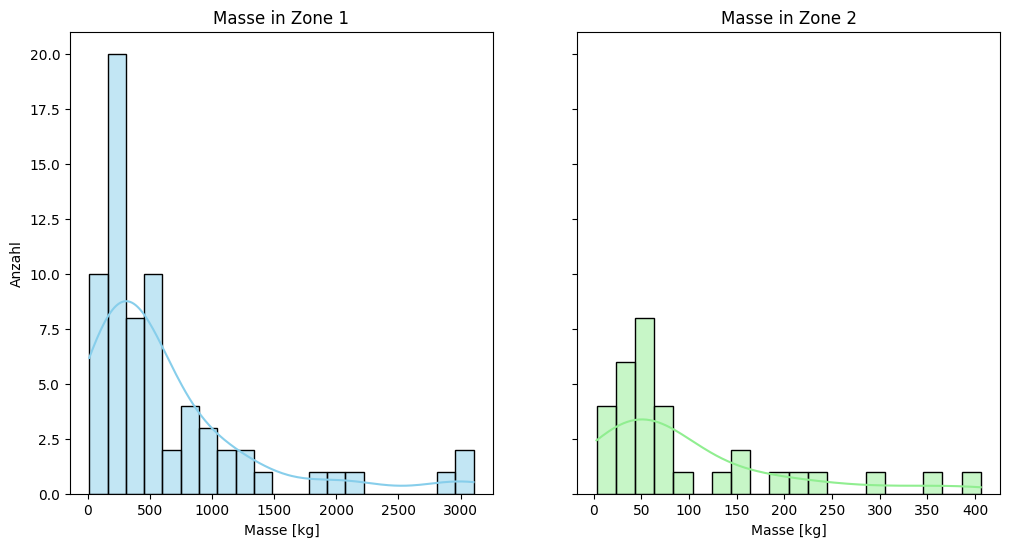

In [296]:
# plot histogram for Masse
plot_hist('Masse [kg]', 150, 20, 'Masse in Zone 1', 'Masse in Zone 2')

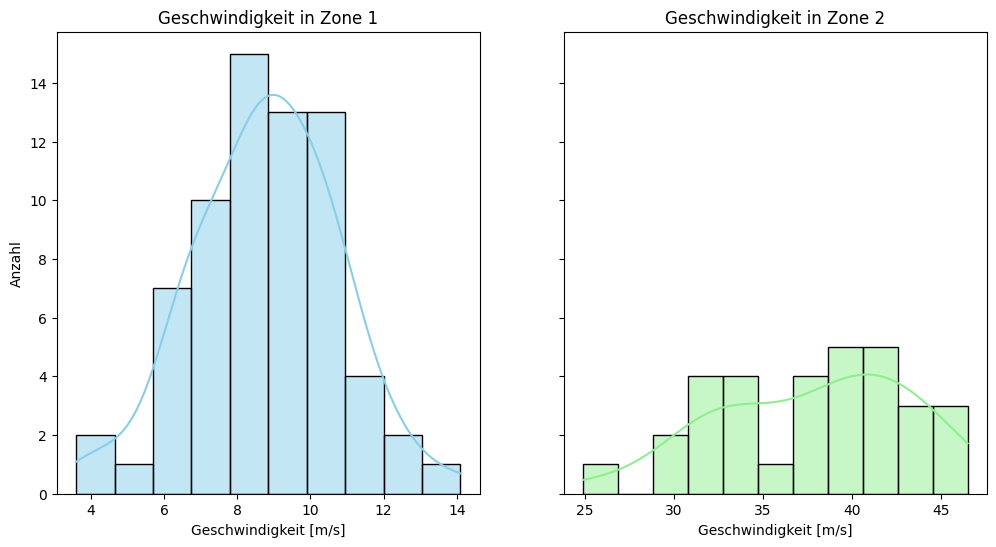

In [297]:
# plot histogram for Geschwindigkeit
plot_hist('Geschwindigkeit [m/s]', 1, 2, 'Geschwindigkeit in Zone 1', 'Geschwindigkeit in Zone 2')

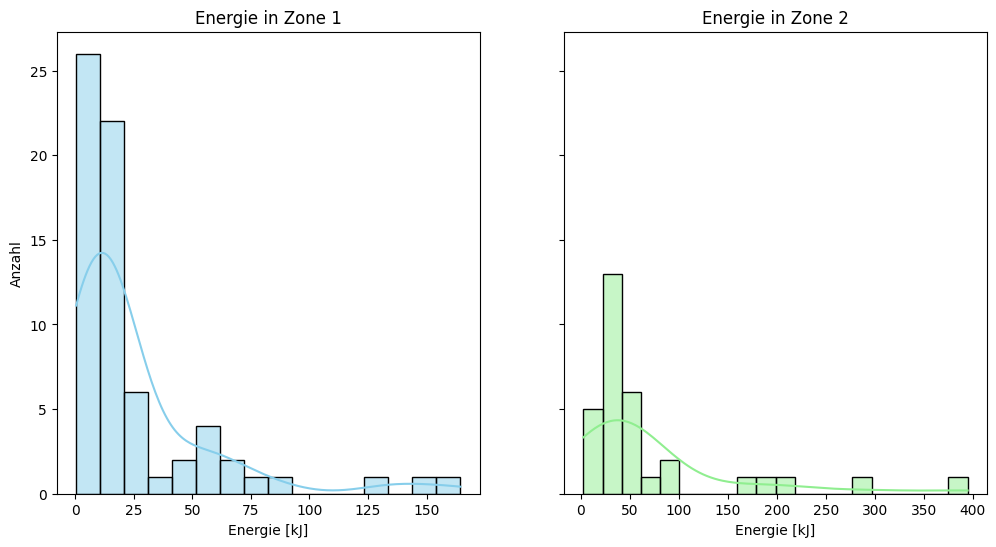

In [298]:
# plot histogram for Energie
plot_hist('Energie [kJ]', 10, 20, 'Energie in Zone 1', 'Energie in Zone 2')

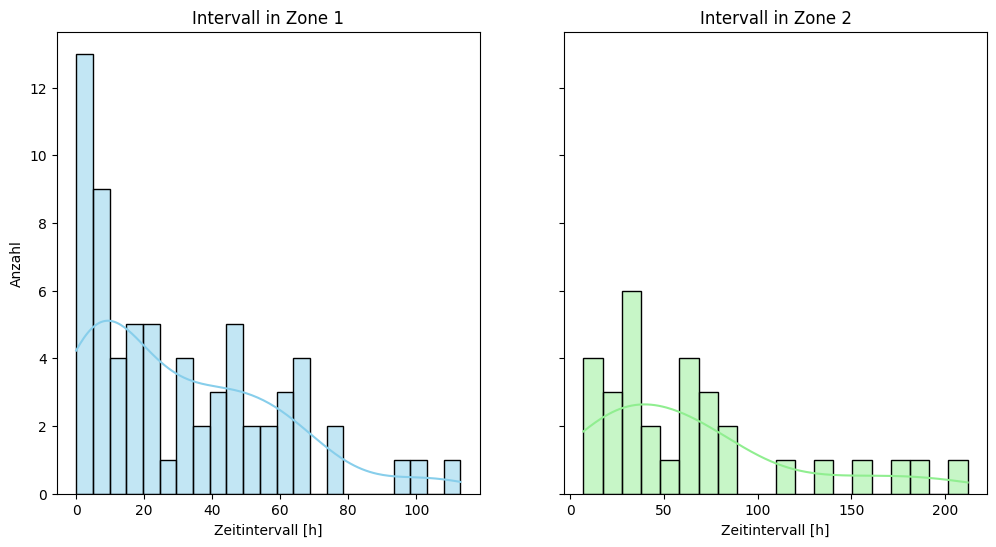

In [299]:
# plot histogram for Zeitintervall
plot_hist('Zeitintervall [h]', 5, 10, 'Intervall in Zone 1', 'Intervall in Zone 2')

### Boxplots

In [300]:
# function for boxplot
def plot_boxplot(feature: str, title: str) -> None:
    
    # 2 subplots above each other
    fig, ax = plt.subplots(figsize=(10, 6))

    # boxplot df1
    sns.boxplot(df1, x = feature, color='skyblue', orient='h', positions=[0], width=0.6)

    # boxplot df2
    sns.boxplot(df2, x = feature, color='lightgreen', orient='h', positions=[1], width=0.6)

    # label y axis
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Zone 1', 'Zone 2'])

    # position the plots
    plt.ylim(-0.5, 1.5)

    # titel
    plt.title(title)
    plt.xlabel(feature)

    plt.show()

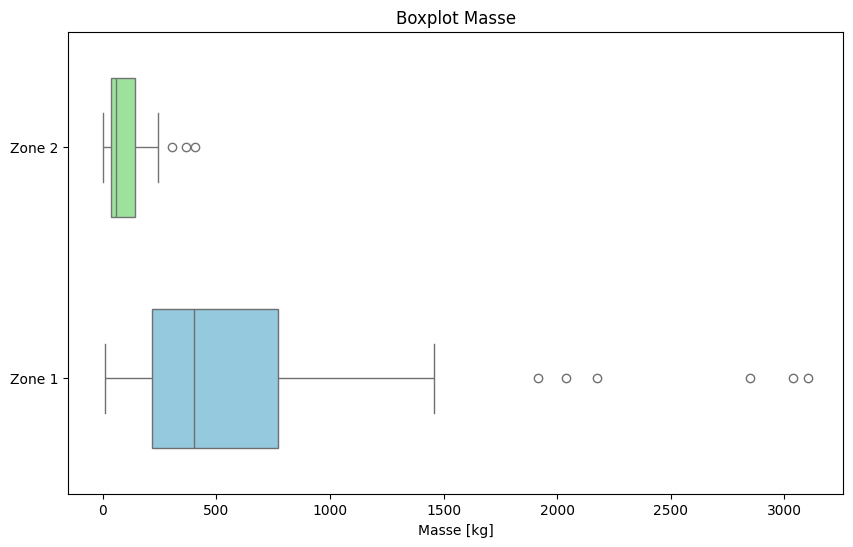

In [301]:
# boxplot for Masse
plot_boxplot('Masse [kg]', 'Boxplot Masse')

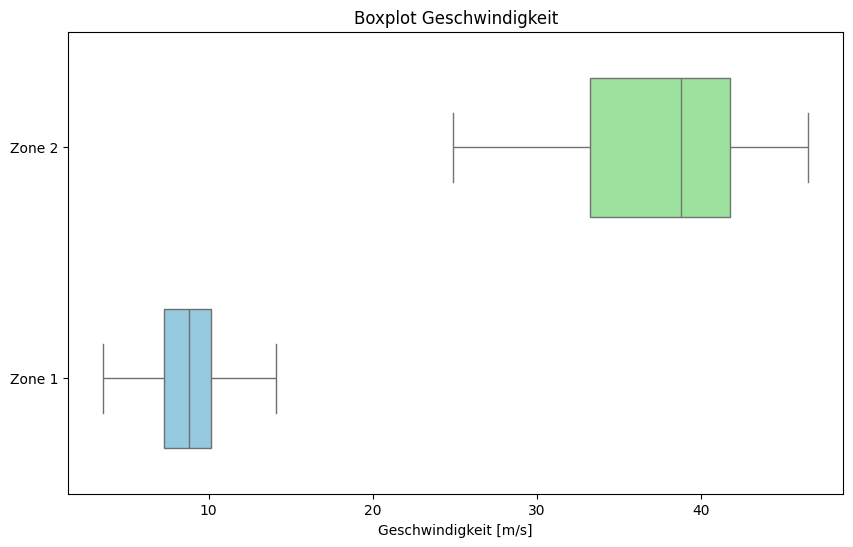

In [302]:
# boxplot for Geschwindigkeit
plot_boxplot('Geschwindigkeit [m/s]', 'Boxplot Geschwindigkeit')

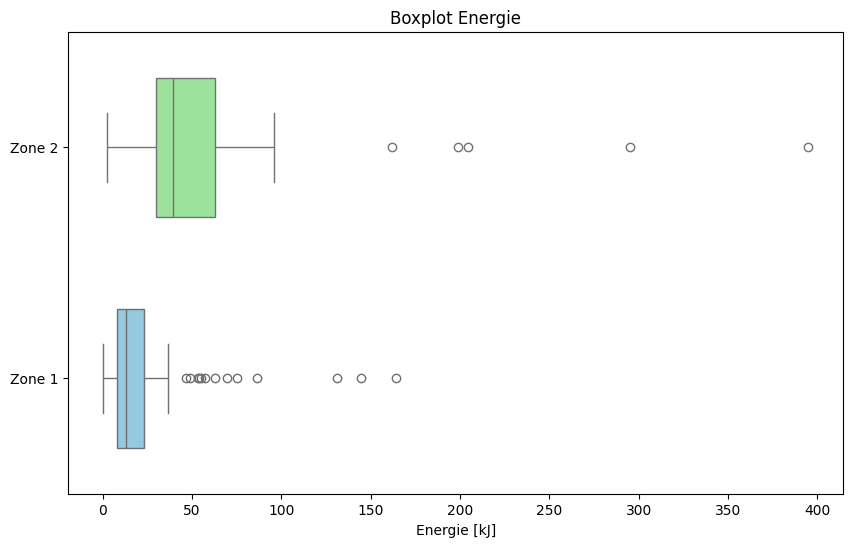

In [303]:
# boxplot for Energie
plot_boxplot('Energie [kJ]', 'Boxplot Energie')

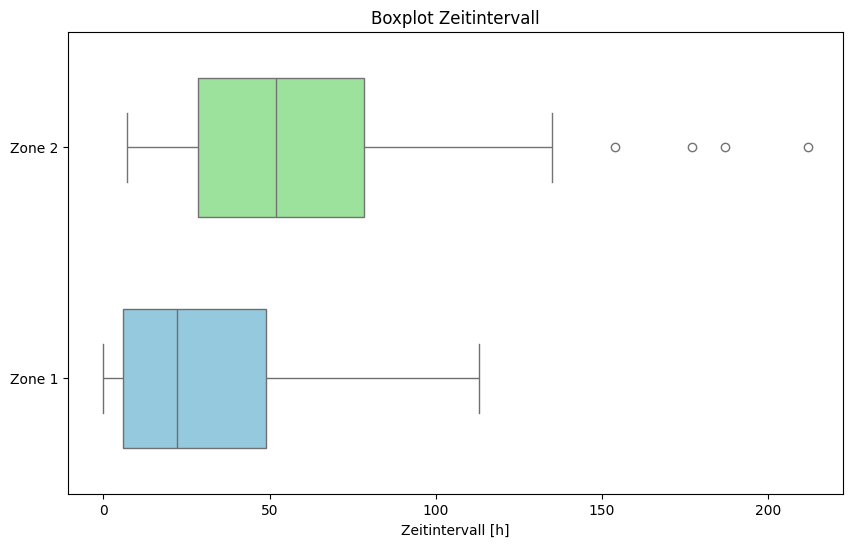

In [304]:
# boxplot for Zeitintervall
plot_boxplot('Zeitintervall [h]', 'Boxplot Zeitintervall')

### Scatterplots

In [305]:
# add Zone
df1['Zone'] = 'Zone 1'
df2['Zone'] = 'Zone 2'

# combine df1 and df2
df_combined = pd.concat([df1, df2])

# reset index
df_combined = df_combined.reset_index(drop=True)

# function for scatterplot
def plot_scatter(feature_1: str, feature_2: str, title: str) -> None:

    # scatterplot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(df_combined, x=feature_1, y=feature_2, hue='Zone', palette=['skyblue', 'lightgreen'])

    # labels
    plt.title(title)
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)

    plt.show()

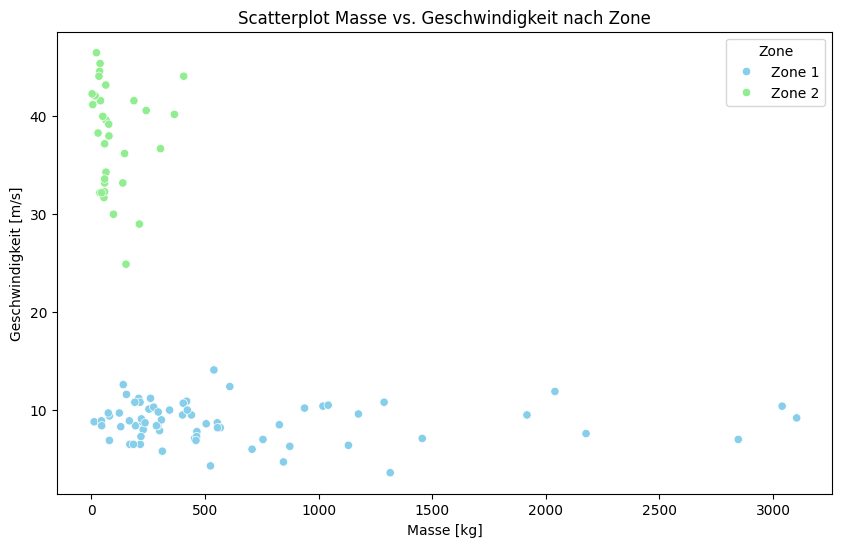

In [306]:
# scatterplot Masse vs. Geschwindigkeit
plot_scatter('Masse [kg]', 'Geschwindigkeit [m/s]', 'Scatterplot Masse vs. Geschwindigkeit nach Zone')

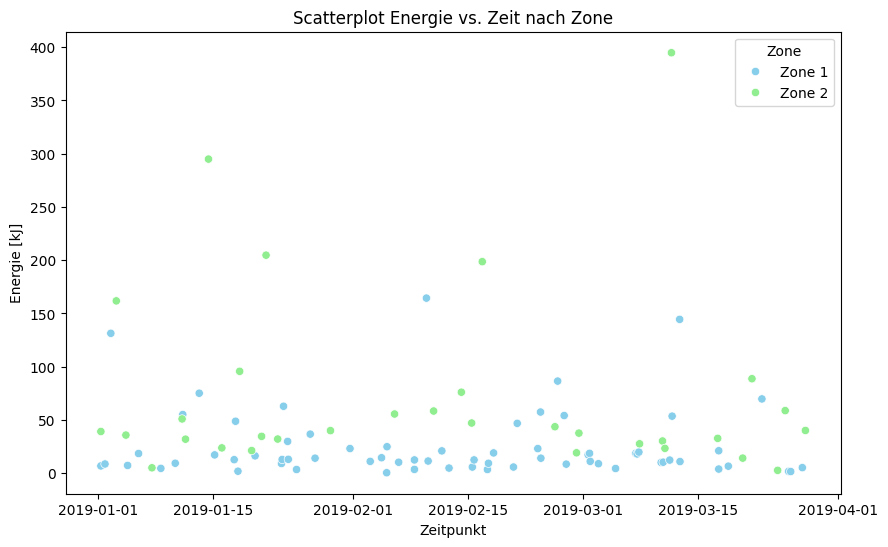

In [307]:
# scatterplot Energie vs. Zeit
plot_scatter('Zeitpunkt', 'Energie [kJ]', 'Scatterplot Energie vs. Zeit nach Zone')

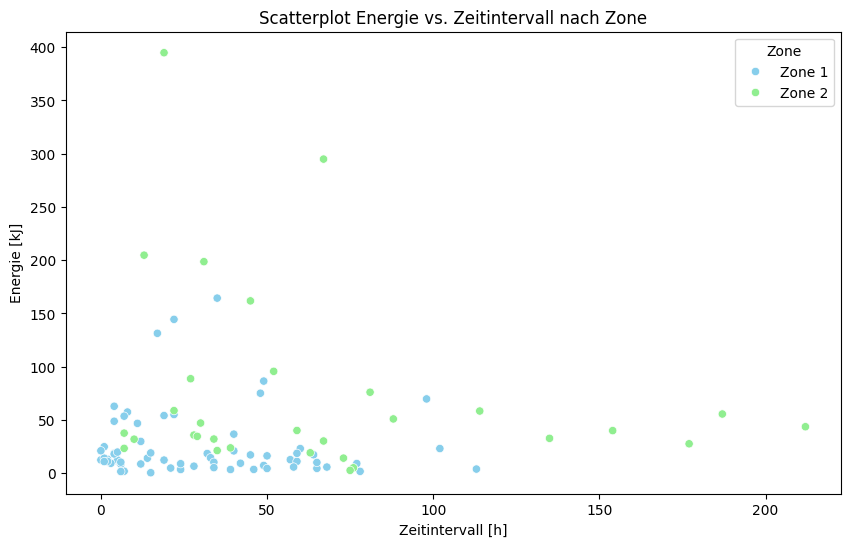

In [308]:
# scatterplot Energie vs. Zeitintervall
plot_scatter('Zeitintervall [h]', 'Energie [kJ]', 'Scatterplot Energie vs. Zeitintervall nach Zone')

## Erkentnis
Die Visualisierungen zeigen unterschiedliche Verteilungen von Masse, Geschwindigkeit und Zeitintervalle für Zone 1 und 2.  
Die beiden Zonen werden wir deshalb weiterhin separat betrachten.


Da wir zuwenige Daten für eine Beurteilung des Risikos haben, generieren wir mehr Daten durch eine Monte Carlo Simulation mit den Zufallsvariablen Masse, Geschwindigkeit und Zeitintervall. Dazu schauen wir uns zuerst ihre Verteilung anhanhd eines fittings an.


In [309]:
# # drop observations with Energie < 50 and Zeitintervall > 24
# df_combined = df_combined.drop(df_combined[(df_combined['Energie [kJ]'] < 50) & (df_combined['Zeitintervall [h]'] > 24)].index)
# df1 = df1.drop(df1[(df1['Energie [kJ]'] < 50) & (df1['Zeitintervall [h]'] > 24)].index)
# df2 = df2.drop(df2[(df2['Energie [kJ]'] < 50) & (df2['Zeitintervall [h]'] > 24)].index)

# # scatterplot Energie vs. Zeitintervall
# plot_scatter('Zeitintervall [h]', 'Energie [kJ]', 'Scatterplot Energie vs. Zeitintervall nach Zone, ohne Energie < 50 und Zeitintervall > 24')

## Beste Verteilung finden

In [310]:
# import additional libraries
from fitter import Fitter, get_common_distributions
from scipy import stats

# extract variables from df and create a dataset dictionary with placeholder for 'fitter' and 'best_fit'
dataset = {
    'masse_1': {
        'data': df1['Masse [kg]'].values,
        'fitter': None,
        'best_fit': None
    },
    'masse_2': {
        'data': df2['Masse [kg]'].values,
        'fitter': None,
        'best_fit': None
    },
    'geschwindigkeit_1': {
        'data': df1['Geschwindigkeit [m/s]'].values,
        'fitter': None,
        'best_fit': None
    },
    'geschwindigkeit_2': {
        'data': df2['Geschwindigkeit [m/s]'].values,
        'fitter': None,
        'best_fit': None
    },
    'zeitintervall_1': {
        'data': df1['Zeitintervall [h]'].values,
        'fitter': None,
        'best_fit': None
    },
    'zeitintervall_2': {
        'data': df2['Zeitintervall [h]'].values,
        'fitter': None,
        'best_fit': None
    },
}

# remove NaN values from zeitintervall_1 and zeitintervall_2
dataset['zeitintervall_1']['data'] = dataset['zeitintervall_1']['data'][~np.isnan(dataset['zeitintervall_1']['data'])]
dataset['zeitintervall_2']['data'] = dataset['zeitintervall_2']['data'][~np.isnan(dataset['zeitintervall_2']['data'])]


In [311]:
# fitting function
def fit_and_display_summary(title: str, distribution=get_common_distributions()) -> None:
    f = Fitter(dataset[title]['data'], distributions=distribution)
    f.fit()
    summary = f.summary(plot=False)
    dataset[title]['fitter'] = f
    print(f"\n**{title.upper()}**")
    display(summary)
    # plt.show()


In [312]:
# let's fit them all
for key in dataset.keys():
    fit_and_display_summary(key)
 

2024-05-14 08:55:59.464 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=1.5e-05)
2024-05-14 08:55:59.478 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=3.6e-05)
2024-05-14 08:55:59.483 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=2.6e-05)
2024-05-14 08:55:59.490 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=4.6e-05)
2024-05-14 08:55:59.509 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=3.3e-05)
2024-05-14 08:55:59.510 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=1.9e-05)
2024-05-14 08:55:59.513 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=2.8e-05)
2024-05-14 08:55:59.514 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy 


**MASSE_1**


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000015,1810.753526,1817.412049,inf,0.065387,0.914829
cauchy,0.000018,1940.238453,1944.677468,inf,0.180140,0.021090
expon,0.000019,1790.287904,1794.726919,inf,0.112432,0.331307
gamma,0.000021,1765.999570,1772.658093,inf,0.117606,0.281179
exponpow,0.000025,1710.846111,1717.504634,inf,0.205474,0.005390


2024-05-14 08:55:59.579 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.001983)
2024-05-14 08:55:59.609 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.002752)
2024-05-14 08:55:59.610 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.002088)
2024-05-14 08:55:59.633 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.00207)
2024-05-14 08:55:59.633 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.002624)
2024-05-14 08:55:59.633 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.001738)
2024-05-14 08:55:59.634 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.002523)
2024-05-14 08:55:59.634 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted ex


**MASSE_2**


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.001738,1510.918873,1513.850345,inf,0.190832,0.170510
lognorm,0.001983,1356.260077,1360.657285,inf,0.138634,0.525008
expon,0.002070,1332.083403,1335.014874,inf,0.157689,0.365264
gamma,0.002088,1332.656086,1337.053294,inf,0.151540,0.413322
exponpow,0.002170,1303.743237,1308.140445,inf,0.196140,0.148793


2024-05-14 08:55:59.646 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=1.107997)
2024-05-14 08:55:59.691 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=1.017533)
2024-05-14 08:55:59.720 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1.010142)
2024-05-14 08:55:59.721 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=1.007418)
2024-05-14 08:55:59.724 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=1.04792)
2024-05-14 08:55:59.724 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=1.840118)
2024-05-14 08:55:59.725 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=1.007418)
2024-05-14 08:55:59.726 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted power


**GESCHWINDIGKEIT_1**


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,1.007418,559.582300,564.021316,inf,0.059355,0.958730
lognorm,1.007418,561.582245,568.240768,inf,0.059355,0.958727
gamma,1.010142,560.352868,567.011391,inf,0.063807,0.928074
chi2,1.017533,558.084152,564.742675,inf,0.075881,0.800376
exponpow,1.047920,542.377735,549.036258,inf,0.073655,0.827877


2024-05-14 08:55:59.805 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.607154)
2024-05-14 08:55:59.808 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.608647)
2024-05-14 08:55:59.828 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=1.19244)
2024-05-14 08:55:59.829 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.741294)
2024-05-14 08:55:59.829 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.608798)
2024-05-14 08:55:59.830 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.62628)
2024-05-14 08:55:59.831 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.607154)
2024-05-14 08:55:59.832 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted ray


**GESCHWINDIGKEIT_2**


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.607154,675.068739,678.000211,inf,0.104641,0.839121
lognorm,0.607154,677.069040,681.466248,inf,0.104643,0.839108
chi2,0.608647,677.413072,681.810279,inf,0.113398,0.763308
gamma,0.608798,677.225194,681.622402,inf,0.113424,0.763071
uniform,0.622910,618.538663,621.470135,inf,0.221065,0.074555


2024-05-14 08:55:59.863 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.10304)
2024-05-14 08:55:59.923 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.024112)
2024-05-14 08:55:59.954 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.015866)
2024-05-14 08:55:59.954 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.017465)
2024-05-14 08:55:59.964 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.015912)
2024-05-14 08:55:59.964 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.009903)
2024-05-14 08:55:59.966 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.010509)
2024-05-14 08:55:59.966 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted e


**ZEITINTERVALL_1**


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.009903,1099.225071,1105.839149,inf,0.176573,2.681675e-02
exponpow,0.010509,1008.532772,1015.146850,inf,0.147101,9.931209e-02
expon,0.010841,1057.745923,1062.155308,inf,0.108669,3.800517e-01
rayleigh,0.015220,1064.859866,1069.269251,inf,0.164622,4.694483e-02
powerlaw,0.015866,1388.602201,1395.216279,inf,0.784941,2.317518e-44


2024-05-14 08:55:59.984 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.0075)
2024-05-14 08:56:00.054 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.008516)
2024-05-14 08:56:00.054 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.008385)
2024-05-14 08:56:00.056 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.006666)
2024-05-14 08:56:00.057 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.008268)
2024-05-14 08:56:00.068 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.006538)
2024-05-14 08:56:00.072 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.007804)
2024-05-14 08:56:00.073 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted 


**ZEITINTERVALL_2**


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,0.006538,1143.938900,1148.240861,inf,0.118612,0.731707
expon,0.006666,1166.166248,1169.034222,inf,0.092643,0.930581
gamma,0.006776,1182.198258,1186.500220,inf,0.174083,0.271495
chi2,0.007101,1212.047730,1216.349692,inf,0.222529,0.078924
rayleigh,0.007477,1159.491889,1162.359863,inf,0.172056,0.283939


### CDF Plot
Um die besten Verteilungen zu vergleichen erzeugen wir eine kumulative Verteilungsfunktion (CDF) Plot

In [313]:
# function to plot the best distributions
def plot_best_distributions(title: str, name: str) -> None:
    f = dataset[title]['fitter']
    data = dataset[title]['data']  # Get data directly from the dataset dictionary
    if f is None or data is None:
        print(f"No fitter results or data available for {title}")
        return

    # Sorting the best distributions based on their sum of squared errors
    best_dists = f.df_errors.sort_values(by='sumsquare_error').index[:5]
    
    plt.figure(figsize=(10, 6))
    x_values = np.linspace(min(data), max(data), 1000)
    
    # Plot empirical CDF
    plt.hist(data, bins=50, density=True, cumulative=True, alpha=0.3, color='skyblue', label='Empirical CDF')
    
    # Plot each of the best 5 distributions
    for dist_name in best_dists:
        dist = getattr(stats, dist_name)
        param = f.fitted_param[dist_name]
        plt.plot(x_values, dist.cdf(x_values, *param), label=dist_name)
    
    plt.title(f'Cumulative Distribution Function - {name}')
    plt.xlabel('Value')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.grid(True)
    plt.show()


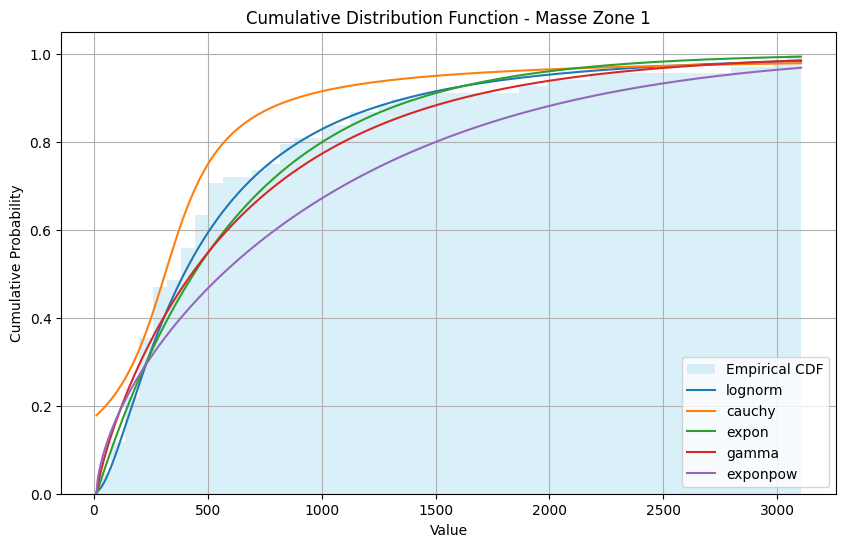

In [314]:
# CDF masse_1
plot_best_distributions('masse_1', 'Masse Zone 1')

Für die Masse in Zone 1 sieht **lognorm** gut aus.

In [315]:
# set best_fit for masse_1
dataset['masse_1']['best_fit'] = 'lognorm'

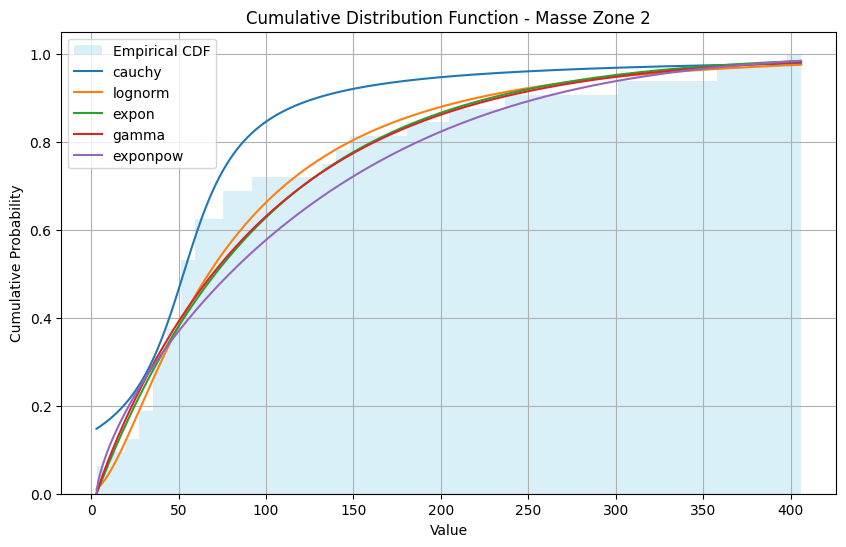

In [316]:
# CDF masse_2
plot_best_distributions('masse_2', 'Masse Zone 2')

Für die Masse in Zone 2 sieht **lognorm** gut aus, besonders bei den höheren Werten.

In [317]:
# set best_fit for masse_2
dataset['masse_2']['best_fit'] = 'lognorm'

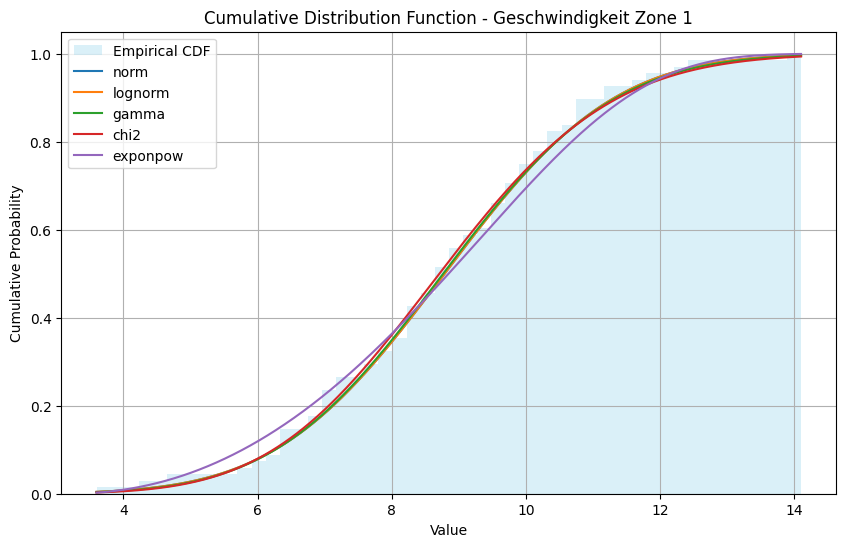

In [318]:
# CDF geschwindigkeit_1
plot_best_distributions('geschwindigkeit_1', 'Geschwindigkeit Zone 1')

Für die Geschwindigkeit in Zone 1 passt **norm** ganz gut.

In [319]:
# set best_fit for geschwindigkeit_1
dataset['geschwindigkeit_1']['best_fit'] = 'norm'

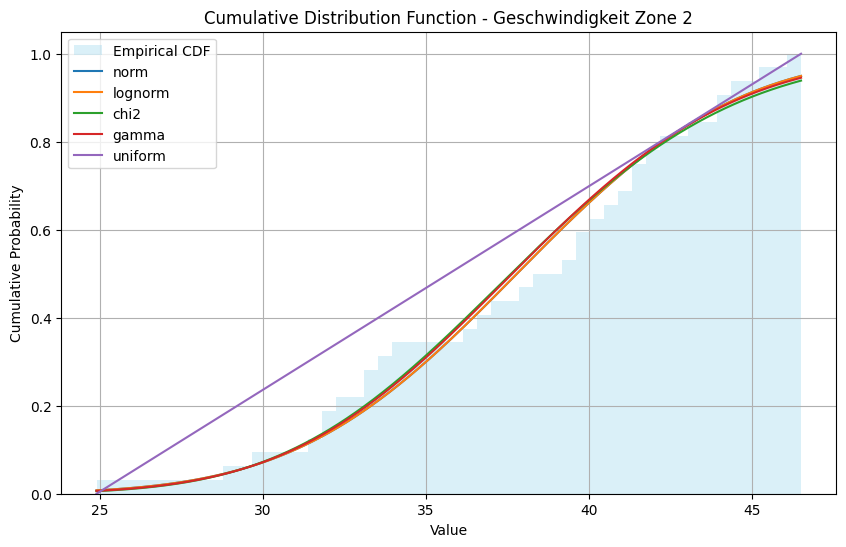

In [320]:
# CDF geschwindigkeit_2
plot_best_distributions('geschwindigkeit_2', 'Geschwindigkeit Zone 2')

Für die Geschwindigkeit in Zone 2 sind alle sehr ähnlich. Wir wählen **norm** aus.

In [321]:
# set best_fit for geschwindigkeit_2
dataset['geschwindigkeit_2']['best_fit'] = 'norm'

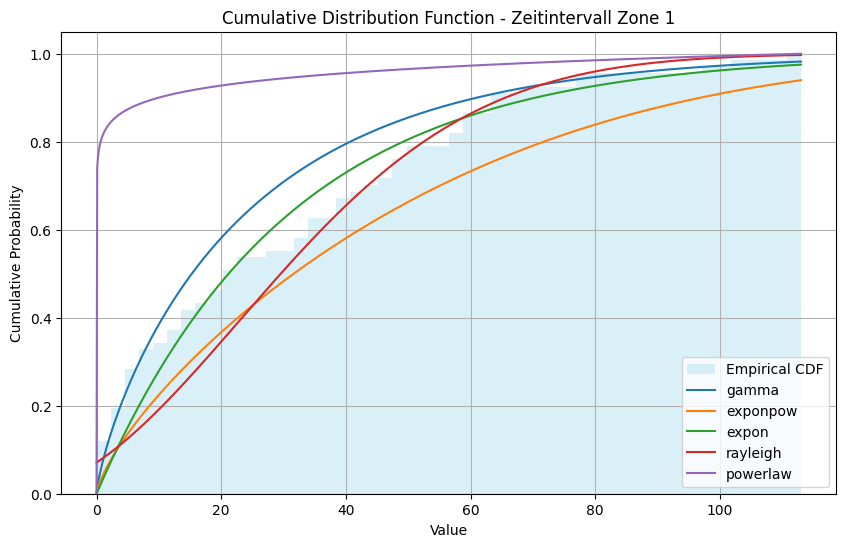

In [322]:
# CDF zeitintervall_1
plot_best_distributions('zeitintervall_1', 'Zeitintervall Zone 1')


Für den Zeitintervall in Zone 1 wählen wir **gamma** aus.

In [323]:
# set best_fit for zeitintervall_1
dataset['zeitintervall_1']['best_fit'] = 'gamma'

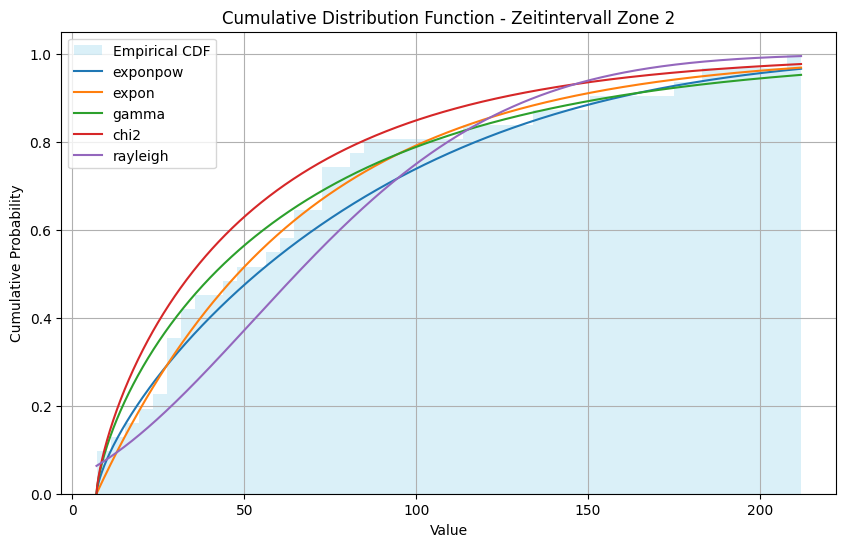

In [324]:
# CDF zeitintervall_2
plot_best_distributions('zeitintervall_2', 'Zeitintervall Zone 2')


Für den Zeitintervall  in Zone 2 wählen wir **gamma**.

In [325]:
# set best_fit for zeitintervall_2
dataset['zeitintervall_2']['best_fit'] = 'gamma'

## Monte Carlo Simulation
Mit der Wahl der Verteilungen sind wir jetzt ready zum Simulieren unserer Daten.

Die Monte Carlo Simulation ist eine Methode in der Mathematik und Statistik, bei der Problemlösungen durch die Simulation von Zufallsprozessen und das mehrfache Ausführen von Experimenten erreicht werden. Dabei werden Zufallszahlen verwendet, um mögliche Szenarien in komplexen Systemen zu modellieren und zu analysieren.

In [326]:
# monte carlo simulation
def monte_carlo_simulation(title: str, n_samples=1000000) -> np.ndarray:       # Default number of samples is 1 million
    f = dataset[title]['fitter']
    best_fit = dataset[title]['best_fit']
    params = f.fitted_param[best_fit]
    dist = getattr(stats, best_fit)
    
    synthetic_data = dist.rvs(*params, size=n_samples)
    
    return synthetic_data

In [327]:
# generate synthetic data for each dataset key
synthetic_datasets = {}
for key in dataset.keys():
    synthetic_data = monte_carlo_simulation(key)
    synthetic_datasets[key] = synthetic_data
    print(f"Generated {len(synthetic_data)} synthetic data points for {key} based on {dataset[key]['best_fit']} distribution.")

Generated 1000000 synthetic data points for masse_1 based on lognorm distribution.
Generated 1000000 synthetic data points for masse_2 based on lognorm distribution.
Generated 1000000 synthetic data points for geschwindigkeit_1 based on norm distribution.
Generated 1000000 synthetic data points for geschwindigkeit_2 based on norm distribution.
Generated 1000000 synthetic data points for zeitintervall_1 based on gamma distribution.
Generated 1000000 synthetic data points for zeitintervall_2 based on gamma distribution.


### Vergleich der generierten Daten mit den Originaldaten

In [328]:
# compare data characteristics
def generate_statistics_table() -> pd.DataFrame:
    columns = ['Key', 'Orig. Mean', 'Synt. Mean', 'Orig. Std Dev', 'Synt. Std Dev']
    stats_data = []
    
    # loop through each key to compute simplified statistics
    for key in dataset.keys():
        original_data = dataset[key]['data']
        synthetic_data = synthetic_datasets[key]
        
        # gather simplified statistics
        stats_data.append([
            key,
            f"{np.mean(original_data):.2f}",  
            f"{np.mean(synthetic_data):.2f}",
            f"{np.std(original_data):.2f}",  
            f"{np.std(synthetic_data):.2f}"
        ])
    
    # create and format DataFrame
    stats_df = pd.DataFrame(stats_data, columns=columns)
    stats_df.set_index('Key', inplace=True)
    
    return stats_df


In [329]:
# generate the statistics table
stats_table = generate_statistics_table()
print(stats_table)

                  Orig. Mean Synt. Mean Orig. Std Dev Synt. Std Dev
Key                                                                
masse_1               628.63     630.67        690.75        781.34
masse_2               101.06     102.02        101.17        117.19
geschwindigkeit_1       8.79       8.79          1.97          1.97
geschwindigkeit_2      37.79      37.79          5.31          5.31
zeitintervall_1        30.55      24.80         27.54         28.27
zeitintervall_2        66.32      66.13         54.28         71.09


Mean und Standart Deviation zeigen, dass die simulierten Daten recht gut mit den original Daten überein passen.

## Simulation Sicherheitsnetze
Ein beauftragtes Ingenieurbüro hat geschätzt, dass die Sicherheitsnetze bis zu einer Aufprallenergie von 1200 kJ sicher sind. Falls bereits Steine mit Gesamtmasse über 2000kg in den Sicherheitsnetzen liegen, beträgt die Aufprallenergie, die von den Sicherheitsnetzen aufgenommen werden kann, nur noch 600 kJ. Steine in den Sicherheitsnetze werden vom Unterhaltsteam entfernt (die Reaktionszeit beträgt 24 Stunden).

In [330]:
# calculate and add energy columns
synthetic_datasets['energie_1'] = 0.5 * synthetic_datasets['masse_1'] * synthetic_datasets['geschwindigkeit_1'] ** 2 / 1000
synthetic_datasets['energie_2'] = 0.5 * synthetic_datasets['masse_2'] * synthetic_datasets['geschwindigkeit_2'] ** 2 / 1000

In [331]:
def simulate_net_failure(zone, mass_key, energy_key, time_intervals_key):
    # initialize variables
    total_mass = 0
    time_elapsed = 0
    maintenance_interval = 24 
    last_maintenance_time = 0

    # energy thresholds
    max_safe_energy = 1200  
    reduced_safe_energy = 600 
    mass_threshold = 2000 

    # list to record failures
    failures = []

    # loop through each event based on time intervals
    for mass, energy, time_interval in zip(synthetic_datasets[mass_key], synthetic_datasets[energy_key], synthetic_datasets[time_intervals_key]):
        # check for maintenance
        if time_elapsed - last_maintenance_time >= maintenance_interval:
            total_mass = 0  # Reset mass
            last_maintenance_time = time_elapsed

        # update total mass
        total_mass += mass
        time_elapsed += time_interval

        # determine the current safe energy limit based on the accumulated mass
        current_safe_energy = reduced_safe_energy if total_mass > mass_threshold else max_safe_energy

        # check if the current energy exceeds the safe energy limit
        if energy > current_safe_energy:
            failures.append((time_elapsed, energy, total_mass))

    return failures

# simulation for both zones
zone1_failures = simulate_net_failure("Zone 1", "masse_1", "energie_1", "zeitintervall_1")
zone2_failures = simulate_net_failure("Zone 2", "masse_2", "energie_2", "zeitintervall_2")

# output the results
print("Zone 1 Failures:")
for failure_time, energy, mass in zone1_failures:
    print(f"Time: {failure_time:.0f} hours, Energy: {energy:.0f} kJ, Mass: {mass:.0f} kg")

print("\nZone 2 Failures:")
for failure_time, energy, mass in zone2_failures:
    print(f"Time: {failure_time:.0f} hours, Energy: {energy:.0f} kJ, Mass: {mass:.0f} kg")


Zone 1 Failures:
Time: 19747 hours, Energy: 1030 kJ, Mass: 14021 kg
Time: 224266 hours, Energy: 757 kJ, Mass: 15731 kg
Time: 688809 hours, Energy: 730 kJ, Mass: 18767 kg
Time: 775145 hours, Energy: 679 kJ, Mass: 13039 kg
Time: 1063295 hours, Energy: 671 kJ, Mass: 8740 kg
Time: 1099494 hours, Energy: 1254 kJ, Mass: 20573 kg
Time: 1267074 hours, Energy: 1078 kJ, Mass: 28737 kg
Time: 1516607 hours, Energy: 1419 kJ, Mass: 34804 kg
Time: 1608229 hours, Energy: 866 kJ, Mass: 13472 kg
Time: 1829159 hours, Energy: 795 kJ, Mass: 13357 kg
Time: 1860082 hours, Energy: 642 kJ, Mass: 10612 kg
Time: 1867473 hours, Energy: 624 kJ, Mass: 11520 kg
Time: 2047803 hours, Energy: 1042 kJ, Mass: 13402 kg
Time: 2134434 hours, Energy: 625 kJ, Mass: 11959 kg
Time: 2144928 hours, Energy: 698 kJ, Mass: 9870 kg
Time: 2233503 hours, Energy: 693 kJ, Mass: 15336 kg
Time: 2259093 hours, Energy: 624 kJ, Mass: 12690 kg
Time: 2496684 hours, Energy: 608 kJ, Mass: 11449 kg
Time: 2604838 hours, Energy: 1068 kJ, Mass: 13758

In [332]:
# function to plot failures
def plot_failures(zone_failures: list, zone_name: str) -> None:
    # prepare data for plotting
    times = [failure[0] for failure in zone_failures]  # extracting times in hours
    energies = [failure[1] for failure in zone_failures]

    # convert time from hours to years
    times_in_years = [time / 8760 for time in times]

    # create scatter plot for failures
    plt.figure(figsize=(12, 6))
    scatter = plt.scatter(times_in_years, energies, c=energies, cmap='Reds', edgecolor='black', alpha=0.75, s=100)
    plt.colorbar(scatter, label='Energy at Failure (kJ)')

    # add details
    plt.title(f'Failures Over Time - {zone_name}')
    plt.xlabel('Time (years)')
    plt.ylabel('Energy at Failure (kJ)')
    plt.grid(True)
    plt.show()


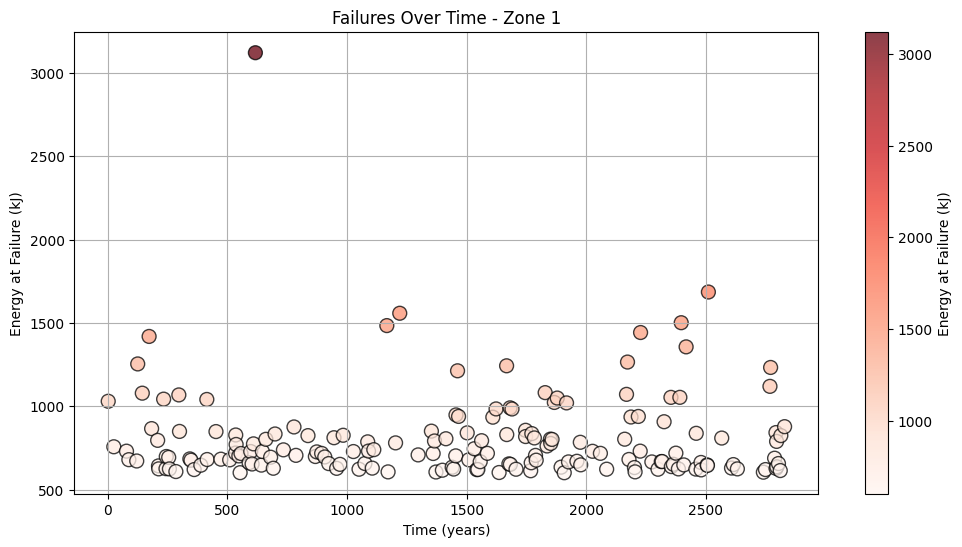

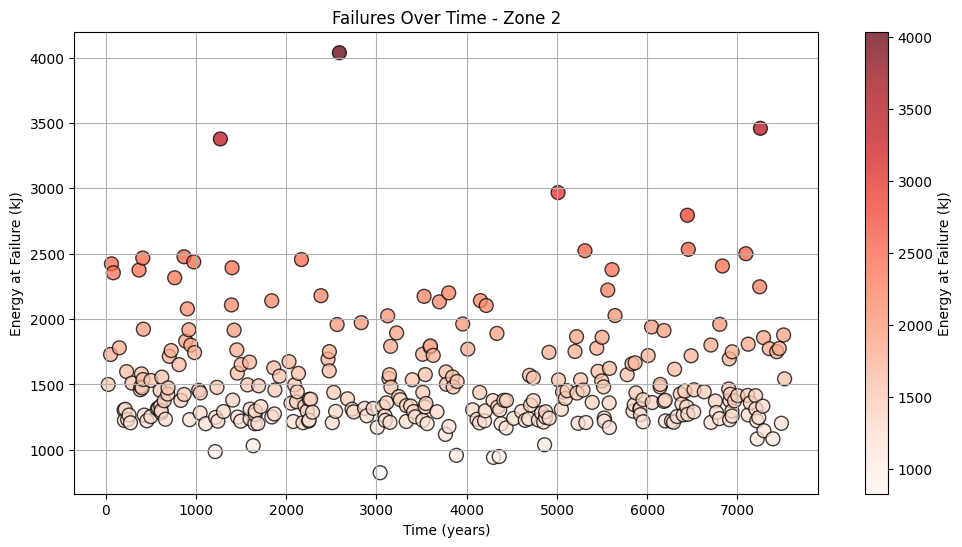

In [333]:
# call the function for Zone 1 and Zone 2
plot_failures(zone1_failures, "Zone 1")
plot_failures(zone2_failures, "Zone 2")

In [334]:
# compute simulated years, total number of failures and failure rate
years_1 = zone1_failures[-1][0]/ 8760   # hours in a year
years_2 = zone2_failures[-1][0]/ 8760   # hours in a year

failures_1 = len(zone1_failures)
failures_2 = len(zone2_failures)

failure_rate_1 = failures_1 / years_1
failure_rate_2 = failures_2 / years_2

total_failure_rate = (failures_1 / years_1) + (failures_2 / years_2)

print("Simulation Results:\n")
print("Zone 1:")
print(f"Simulated Years: {years_1:.0f}")
print(f"Total Failures: {failures_1}")
print(f"Failure Rate: {failure_rate_1:.3f} failures/year")
print("\nZone 2:")
print(f"Simulated Years: {years_2:.0f}")
print(f"Total Failures: {failures_2}")
print(f"Failure Rate: {failure_rate_2:.3f} failures/year")
print(f"\nTotal Failure Rate: {total_failure_rate:.3f} failures/year")



Simulation Results:

Zone 1:
Simulated Years: 2828
Total Failures: 174
Failure Rate: 0.062 failures/year

Zone 2:
Simulated Years: 7522
Total Failures: 300
Failure Rate: 0.040 failures/year

Total Failure Rate: 0.101 failures/year


## Wahrscheinlichkeit, dass ein Auto getroffen wird

Das tägliche Verkehrsaufkommen beträgt 600 Autos. Stau kommt auf der Strecke nicht vor. Die Tempolimite beträgt 60 km/h.
Damit die Strasse offen bleiben kann, muss gezeigt werden, dass die jährliche Wahrscheinlichkeit von Todesfällen infolge Steinschlags kleiner als 0.002 ist.

##### Exponierte Zeit
Die Gefahrenzone wird durch die Bremsstrecke eines Autos definiert. Wenn ein Stein fällt und das Auto rechtzeitig bremsen kann, kommt es zu keinem Zwischenfall. Die exponierte Zeit ist dementsprechend die Dauer, die ein Auto benötigt, um diese Bremsstrecke zu durchfahren. Die Bremsstrecke berechnet sich aus Reacktionsweg ( v[m/s] * 1 Sekunde ) und Bremsweg ( v[m/s]**2 / 2*a ), wobei die Bremsverzögerung a für ein PW zwischen 0.8 bei trockener und 0.6 bei nasser Strasse beträgt ( https://www.ingenieur.de/technik/fachbereiche/verkehr/bremsweg-beim-auto-richtig-berechnen-mit-formel/ ).

##### Berechnung der Kollisionswahrscheinlichkeit über ein Jahr
Um die jährliche Wahrscheinlichkeit zu bestimmen, dass ein Auto von einem Stein getroffen wird, verfolgen wir folgende Schritte:

##### 1. Umrechnung der Anzahl der Steine
Die Anzahl der Steine, die pro Jahr fallen, wird in eine tägliche Rate umgerechnet: $Steine \ pro \ Tag = \frac{x}{365}$, wobei $x$ die Anzahl der Steine pro Jahr ist.

##### 2. Berechnung der täglichen exponierten Zeit aller Autos
Täglich verbringen 600 Autos insgesamt etwa 1800 Sekunden (oder 30 Minuten) in der Gefahrenzone.

##### 3. Tägliche Kollisionswahrscheinlichkeit
Die Wahrscheinlichkeit, dass an einem Tag ein Auto getroffen wird, errechnet sich aus dem Produkt der gesamten täglichen exponierten Zeit aller Autos und der Anzahl der Steine pro Tag, geteilt durch die Gesamtdauer eines Tages in Sekunden:  

$Wahrscheinlichkeit \ pro \ Tag = \frac{\text{Exponierte Zeit aller Autos pro Tag} \times \text{Steine pro Tag}}{\text{Dauer eines Tages in Sekunden}}$.

##### 4. Jährliche Kollisionswahrscheinlichkeit
Die jährliche Wahrscheinlichkeit, dass mindestens einmal ein Auto getroffen wird, basiert auf der Annahme, dass die Ereignisse von Tag zu Tag unabhängig sind: $Wahrscheinlichkeit \ pro \ Jahr = 1 - (1 - \text{Wahrscheinlichkeit pro Tag})^{365}$.


In [335]:
def calculate_death_probability(cars_per_day, speed_kmh, death_limit):

    # calculate the reaction distance for a reaction time of 1 second
    speed_mps = speed_kmh / 3.6
    reaction_distance = speed_mps * 1
    brake_coefficient = 7  # m/s^2, typical value for a car

    # calculate the actual braking distance
    braking_distance = (speed_mps ** 2) / (2 * brake_coefficient)

    # total braking distance
    total_braking_distance = reaction_distance + braking_distance

    # time exposed to falling stone
    time_exposed = total_braking_distance / speed_mps
    
    # daily probability of rockfall
    days_per_year = 365
    daily_probability_of_rockfall = total_failure_rate / days_per_year

    # daily probability that at least one car is hit
    seconds_per_day = 86400
    daily_probability_any_car_hit = cars_per_day * time_exposed / seconds_per_day * daily_probability_of_rockfall

    # yearly probability that at least one car is hit
    probability_no_hit_in_year = (1 - daily_probability_any_car_hit) ** days_per_year
    annual_probability_at_least_one_hit = 1 - probability_no_hit_in_year

    # check if it is safe to operate
    safe_to_operate = annual_probability_at_least_one_hit < death_limit
    return annual_probability_at_least_one_hit, safe_to_operate, time_exposed


In [336]:
# define the parameters
cars_per_day = 600
speed_kmh = 60
death_limit = 0.002

# calculate the probability
probability, is_safe, exposed = calculate_death_probability(cars_per_day, speed_kmh, death_limit)

print(f"The time to cross the danger zone for a car traveling at {speed_kmh} km/h is {exposed:.2f} seconds.\n")
print(f"The yearly probability for death cases is: {probability:.6f}")
print(f"The operation is {'safe' if is_safe else 'not safe'}.")

The time to cross the danger zone for a car traveling at 60 km/h is 2.19 seconds.

The yearly probability for death cases is: 0.001541
The operation is safe.
